In [10]:
import pandas as pd
pd.set_option("display.max_columns", 100)

In [11]:
df = pd.read_csv('creditcard.csv')
df.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [22]:
import seaborn as sns

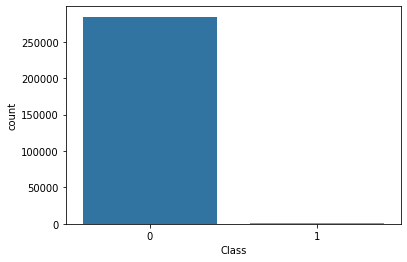

In [23]:
sns.countplot(x='Class', data=df)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'Class'], df['Class'], test_size=0.2, random_state=8)

In [34]:
import xgboost as xgb

In [35]:
xgbrf = xgb.XGBRFClassifier(max_depth=10)
xgbrf.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)], eval_metric='aucpr')

[0]	validation_0-aucpr:0.832515	validation_1-aucpr:0.86232


XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=10, min_child_weight=1, missing=None,
                n_estimators=100, n_jobs=1, nthread=None,
                objective='binary:logistic', random_state=0, reg_alpha=0,
                reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
                subsample=0.8, verbosity=1)

In [36]:
evals_result = xgbrf.evals_result()
evals_result

{'validation_0': {'aucpr': [0.832515]}, 'validation_1': {'aucpr': [0.86232]}}

In [37]:
# Cross Validation
data_dmatrix = xgb.DMatrix(data=df.loc[:, df.columns != 'Class'], label=df['Class'])

params = {'objective':'binary:logistic', 'max_depth':10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10, num_boost_round=100, metrics='aucpr', as_pandas=True, seed=0)  
cv_results.head()

C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Administrator\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


,train-aucpr-mean,train-aucpr-std,test-aucpr-mean,test-aucpr-std
0,0.828052,0.007015,0.782606,0.035597
1,0.836640,0.004595,0.790161,0.036218
2,0.843424,0.005212,0.802728,0.040172
3,0.846010,0.004136,0.816496,0.039456
4,0.846423,0.004057,0.820836,0.039399


In [40]:
cv_results['test-aucpr-mean'].mean()

0.8530316229999998